This code attempts to solve Task1.
1- Columns and Rows are randomly generated using randint() function
2- The polpulated numbers for Alice and Bob are also generated using randint(2, size=3)
3- The qubits are then initialized based on those random values
4- CCX gate is used to calculate the Sum of the generated numbers for Alice and Bob respectively.
5- I save the sum value in a classical register then I got stuck, I can't succeed to check it to display whetehr the player has winned or not.
6- I create entanglement between qubits on the shared tile between Alice and Bob to avoid repetition.


Row Number:  1
Column Number:  1
Alice Qubits:  [0 1 1]
Bob Qubits:  [1 0 0]


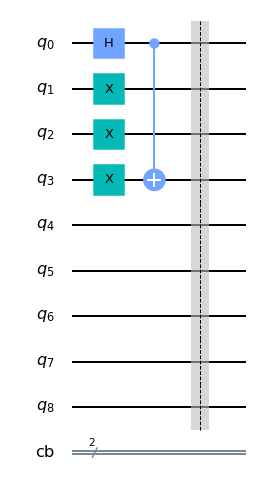

In [6]:
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
col = np.random.randint(1,3,size=1)
row = np.random.randint(1,3,size=1)
col_index = col[0] - 1
row_index = row[0] + 2
Alice_qubits = np.random.randint(2 ,size=3)
Bob_qubits = np.random.randint(2,size=3)
cb = ClassicalRegister(2, 'cb')
q = QuantumRegister(9,"q")
qc = QuantumCircuit(q,cb)
print('Row Number: ', row[0])
print('Column Number: ', col[0])
print('Alice Qubits: ', Alice_qubits)
print('Bob Qubits: ', Bob_qubits)
if Alice_qubits[0] == 1:
   qc.x(0)
if Alice_qubits[1] == 1:
   qc.x(1)
if Alice_qubits[2] == 1:
   qc.x(2)
if Bob_qubits[0] == 1:
   qc.x(3)
if Bob_qubits[1] == 1:
   qc.x(4)
if Bob_qubits[2] == 1:
   qc.x(5)
qc.h(q[col_index])
qc.cx(q[col_index],q[row_index])

qc.barrier()
qc.draw('mpl')



Based on the generated row and column values, we can create a different circuit to create entanglement between the shared tile in the game to avoid being the same.
We have 1:1 --> shared tile is 1,1
        1:2 --> shared tile is 1,2
        1:3 --> shared tile is 1,3
        Do you see a pattern here? Let's continue
        2:1 --> shared tile is 2,1
        2:2 --> shared tile is 2,2
        2:3 --> shared tile is 2,3 ..etc.
        3:1   3:2  3:3
        I think we can conclude that we have to create entanglement between q[col-1] and q[row+2]

{'001': 516, '010': 508}


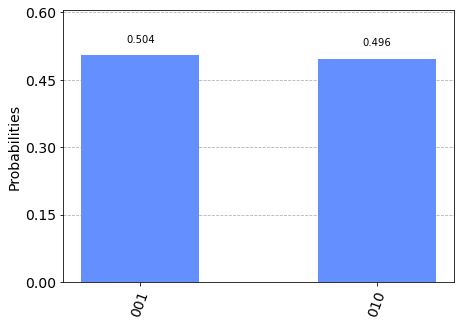

In [5]:
#To ensure that the shared tile will have a repeated number
#, we will create an entaglement between them to create the state |00> + |11> /sqrt(2)


qc.barrier()
qc.draw('mpl')


In [ ]:
#Alice Sum
qc.ccx(0, 1, 2)
qc.measure(2,cb[0])

#Bob Sum
qc.ccx(3, 4, 5)
qc.measure(5,cb[1])

qc.draw('mpl')
#similarity = np.dot(q[col_index],q[row_index])
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)

In [ ]:
print("Both Alice and Bob has a 50% chance of winning.")